In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sbn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
a_data = np.loadtxt('data/siteA.txt')
b_data = np.loadtxt('data/siteB.txt')

In [4]:
len(a_data), len(b_data)

(800, 800)

In [5]:
x = np.arange(0, 1.01, .01)

In [6]:
y = stats.uniform.pdf(x)

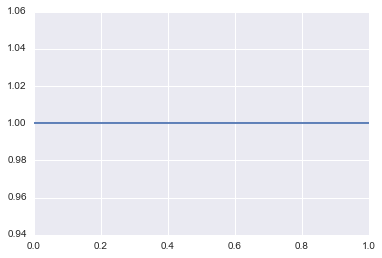

In [7]:
plt.plot(x,y);

In [8]:
def plot_with_fill(x,y,label):
    lines = plt.plot(x,y,label=label, lw=2)
    plt.fill_between(x, 0, y, alpha=.2, color=lines[0].get_c())
    #plt.ylim(ymax = 2) 
    plt.legend(lines, label)
    plt.show()

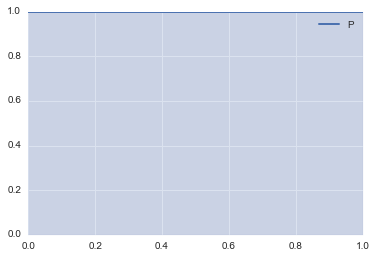

In [9]:
plot_with_fill(x, y, 'Prior');

In [10]:
y_beta = stats.beta.pdf(x, a=4, b=2)

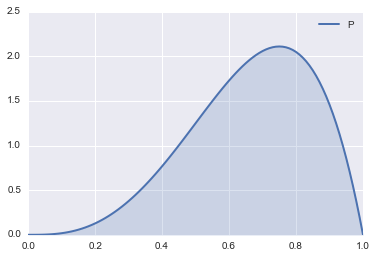

In [11]:
plot_with_fill(x, y_beta, 'Prior')

In [13]:
#50 conversions test
alpha = sum(a_data[:50])
beta = 50 - alpha

In [14]:
y_50 = stats.beta.pdf(x, a=alpha, b=beta)

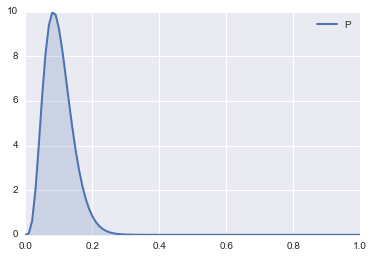

In [15]:
plot_with_fill(x, y_50, 'Posterior after 50')

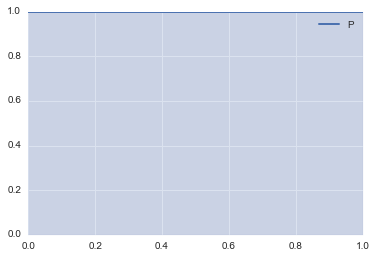

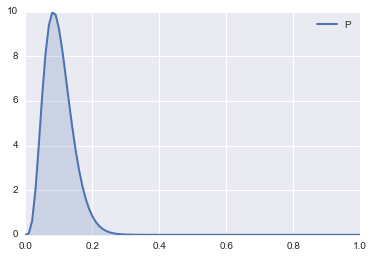

In [16]:
plot_with_fill(x, y, 'Prior')
plot_with_fill(x, y_50, 'Posterior after 50')

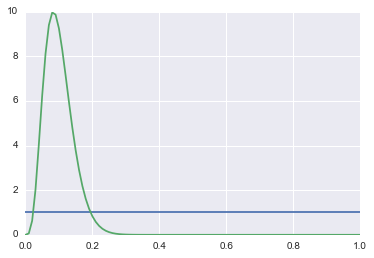

In [17]:
plt.plot(x, y)
plt.plot(x, y_50)

In [18]:
#100 conversions test
alpha100 = sum(a_data[:100])
beta100 = 100 - alpha

alpha200 = sum(a_data[:200])
beta200 = 200 - alpha

alpha400 = sum(a_data[:400])
beta400 = 400 - alpha

alpha800 = sum(a_data[:800])
beta800 = 800 - alpha

y_100 = stats.beta.pdf(x, a=alpha100, b=beta100)
y_200 = stats.beta.pdf(x, a=alpha200, b=beta200)
y_400 = stats.beta.pdf(x, a=alpha400, b=beta400)
y_800 = stats.beta.pdf(x, a=alpha800, b=beta800)

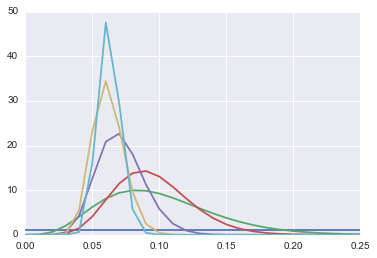

In [19]:
plt.xlim(xmax=.25)
plt.plot(x, y)
plt.plot(x, y_50)
plt.plot(x, y_100)
plt.plot(x, y_200)
plt.plot(x, y_400)
plt.plot(x, y_800);

In [20]:
alpha800

53.0

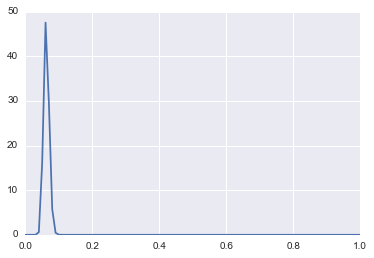

In [21]:
plt.plot(x, y_800);

In [22]:
arrayA = np.random.beta(a=alpha800, b=beta800, size=10000)

In [23]:
alphaB = sum(b_data[:800])
betaB = 800 - alphaB
arrayB = np.random.beta(a=alphaB, b=betaB, size=10000)

In [24]:
arrayB

array([ 0.08527052,  0.10003779,  0.09718972, ...,  0.08783127,
        0.11456825,  0.12505599])

In [25]:
arrayA

array([ 0.0661965 ,  0.06449578,  0.06241264, ...,  0.05006987,
        0.05374128,  0.05980149])

In [26]:
'''Makes a new binary value array 'c' that is a comparison on of the values by index in the two
#arrays.'''
c = np.array([1 if x>y else 0 for x,y in zip(arrayB,arrayA)])

In [28]:
y_data_b = stats.beta.pdf(x, a=alphaB, b=betaB)

#plt.plot(x, y_800)
#plt.plot(x,y_data_b)

In [30]:
# stats.beta.pdf(.95, alpha800, beta800)